# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# ! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.display import HTML

# Import API key
from api_keys import weather_api_key
# import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + weather_api_key +  "&q="
base_url
response = requests.get(base_url).json()
response


{'cod': '400', 'message': 'Nothing to geocode'}

In [5]:
# {'coord': {'lon': -79.2353, 'lat': 42.097},
#  'weather': [{'id': 801,
#    'main': 'Clouds',
#    'description': 'few clouds',
#    'icon': '02n'}],
#  'base': 'stations',
#  'main': {'temp': 287.52,
#   'feels_like': 283.83,
#   'temp_min': 285.37,
#   'temp_max': 288.71,
#   'pressure': 1011,
#   'humidity': 72},
#  'visibility': 10000,
#  'wind': {'speed': 5.1, 'deg': 171, 'gust': 12.81},
#  'clouds': {'all': 20},
#  'dt': 1616634795,
#  'sys': {'type': 1,
#   'id': 4588,
#   'country': 'US',
#   'sunrise': 1616584370,
#   'sunset': 1616628796},
#  'timezone': -14400,
#  'id': 5122534,
#  'name': 'Jamestown',
#  'cod': 200}


In [6]:
# Starting URL for Weather Map API Call

city_info = []
# temps = []
# humid = []
# cloudiness = []
# wind_speed = []
# lats = []

#create query url
for city in cities:
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    response = requests.get(query).json()
    
    try:
        
        name = response['name']
        
        temp = response['main']['temp_max']

        hum = response['main']['humidity']
       
        cloud = response['clouds']['all']
        
        wind = response['wind']['speed']
        
        lon = response['coord']['lon']
        
        lat = response['coord']['lat']
        
        city_info.append({"City Name": name, "Temperature": temp, "Humidity": hum, "Cloudiness": cloud, "Wind": wind, "Longitude": lon, "Latitude": lat})
        
    except KeyError:
        print("City is not found")
        
city_info

City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found
City is not found


[{'City Name': 'Puerto Ayora',
  'Temperature': 80.6,
  'Humidity': 78,
  'Cloudiness': 75,
  'Wind': 9.22,
  'Longitude': -90.3518,
  'Latitude': -0.7393},
 {'City Name': 'Aswān',
  'Temperature': 86.45,
  'Humidity': 9,
  'Cloudiness': 0,
  'Wind': 14.47,
  'Longitude': 32.907,
  'Latitude': 24.0934},
 {'City Name': 'Ushuaia',
  'Temperature': 55.4,
  'Humidity': 54,
  'Cloudiness': 75,
  'Wind': 5.75,
  'Longitude': -68.3,
  'Latitude': -54.8},
 {'City Name': 'Sinnamary',
  'Temperature': 78.3,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind': 12.5,
  'Longitude': -52.95,
  'Latitude': 5.3833},
 {'City Name': 'Rikitea',
  'Temperature': 78.49,
  'Humidity': 74,
  'Cloudiness': 100,
  'Wind': 17.38,
  'Longitude': -134.9692,
  'Latitude': -23.1203},
 {'City Name': 'Cidreira',
  'Temperature': 72.5,
  'Humidity': 77,
  'Cloudiness': 24,
  'Wind': 11.1,
  'Longitude': -50.2056,
  'Latitude': -30.1811},
 {'City Name': 'Atuona',
  'Temperature': 80.8,
  'Humidity': 70,
  'Cloudiness': 2,


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame(city_info)
# weather_df

new_output = "output_data/new_cities.csv"
weather_df.to_csv(new_output, index_label= "ID")

In [8]:
#To HTML
results = weather_df.to_html
print(results)

<bound method DataFrame.to_html of          City Name  Temperature  Humidity  Cloudiness   Wind  Longitude  \
0     Puerto Ayora        80.60        78          75   9.22   -90.3518   
1            Aswān        86.45         9           0  14.47    32.9070   
2          Ushuaia        55.40        54          75   5.75   -68.3000   
3        Sinnamary        78.30        87         100  12.50   -52.9500   
4          Rikitea        78.49        74         100  17.38  -134.9692   
..             ...          ...       ...         ...    ...        ...   
569         Racine        61.00        51          60   5.75   -88.0751   
570  San Policarpo        76.50        88          80   5.17   125.5072   
571        Katakwi        68.59        88          98   3.89    33.9661   
572    Yerbogachën        28.98        96         100   1.48   108.0108   
573     Magdagachi        28.35        82           5   4.68   125.8000   

     Latitude  
0     -0.7393  
1     24.0934  
2    -54.8000  


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df

,City Name,Temperature,Humidity,Cloudiness,Wind,Longitude,Latitude
0,Puerto Ayora,80.60,78,75,9.22,-90.3518,-0.7393
1,Aswān,86.45,9,0,14.47,32.9070,24.0934
2,Ushuaia,55.40,54,75,5.75,-68.3000,-54.8000
3,Sinnamary,78.30,87,100,12.50,-52.9500,5.3833
4,Rikitea,78.49,74,100,17.38,-134.9692,-23.1203
...,...,...,...,...,...,...,...
569,Racine,61.00,51,60,5.75,-88.0751,42.7495
570,San Policarpo,76.50,88,80,5.17,125.5072,12.1791
571,Katakwi,68.59,88,98,3.89,33.9661,1.8911
572,Yerbogachën,28.98,96,100,1.48,108.0108,61.2767


In [10]:
#  Get the indices of cities that have humidity over 100%.
# Not applicable


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

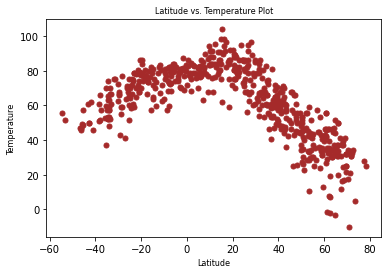

In [12]:
marker_size=12
plt.scatter(weather_df['Latitude'],weather_df['Temperature'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Temperature Plot',fontsize =8)
plt.xlabel('Latitude',fontsize =8)
plt.ylabel('Temperature',fontsize =8)

# # Print test
# plt.show()

plt.savefig('Temp vs Lat.png')


## Latitude vs. Humidity Plot

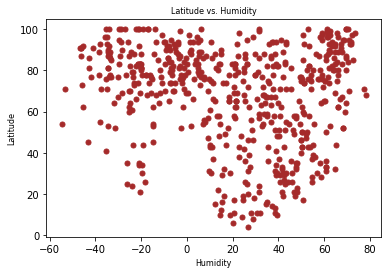

In [13]:
marker_size=12
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Humidity',fontsize =8)
plt.xlabel('Humidity',fontsize =8)
plt.ylabel('Latitude',fontsize =8)

# # Print test
# plt.show()

plt.savefig('Hum vs.Lat.png')

## Latitude vs. Cloudiness Plot

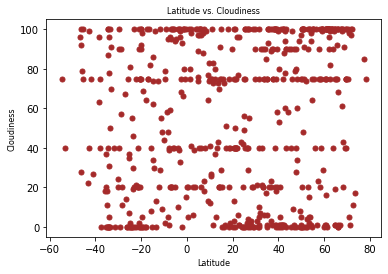

In [14]:
marker_size=12
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Cloudiness',fontsize =8)
plt.xlabel('Latitude',fontsize =8)
plt.ylabel('Cloudiness',fontsize =8)

# # Print test
# plt.show()

plt.savefig('Clou vs.Lat.png')

## Latitude vs. Wind Speed Plot

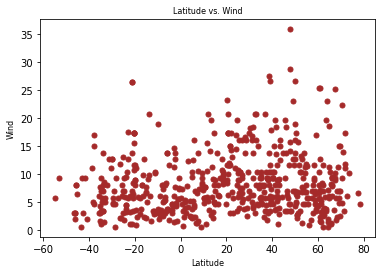

In [15]:
marker_size=12
plt.scatter(weather_df['Latitude'],weather_df['Wind'],s=25, color="brown")
# Plot beautification
plt.title('Latitude vs. Wind',fontsize =8)
plt.xlabel('Latitude',fontsize =8)
plt.ylabel('Wind',fontsize =8)

# # Print test
# plt.show()

plt.savefig('Win vs.Lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression